<a href="https://colab.research.google.com/github/karthikpuranik11/FIRE2021/blob/main/Tamil/Bert%2BbiLSTM_Tamil_transliterated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers==3.3.1

     |████████████████████████████████| 1.1MB 5.3MB/s 
     |████████████████████████████████| 1.2MB 17.0MB/s 
     |████████████████████████████████| 3.0MB 27.2MB/s 
     |████████████████████████████████| 901kB 37.7MB/s 


In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
train1=pd.read_csv('/content/output_tamil_tran.csv', engine='python')
train1['labels']=LabelEncoder().fit_transform(train1['category'])
#train=train.drop(columns='label')
train1

,Unnamed: 0,Unnamed: 0.1,text,category,trans,labels
0,0,0,Vani bhojam fans hit like solli 500 like Vangi...,unknown_state,{'ta': 'வாணி பூஜாம் பான்ஸ் ஹிட் லிக் சொல்லி 50...,5
1,1,1,I love you ajith very I like,Positive,{'ta': 'ஐஸ் லோவ் யூ அஜித் வேரி ஐஸ் லிக்'},2
2,2,2,ennaya trailer Ku mudi Ellam nikkudhu... Vera ...,Positive,{'ta': 'எண்ணய டிரைலர் கூ முடி எல்லம் நிக்குது....,2
3,3,3,Vijay Annaa Ur Maassssss Therrrrriiiiii,Positive,{'ta': 'விஜய் அன்னா உர் மாசஸ் தெற்றி'},2
4,4,4,நம்ப நடே நாசாமா தான் போச்சி,Negative,{'ta': 'நம்ப நடே நாசாமா தான் போச்சி'},1
...,...,...,...,...,...,...
35651,35651,35651,ஒருவர் செய்த தவறுக்காக எல்லாரையும் பழி போடுவது...,Mixed_feelings,{'ta': 'ஒருவர் செய்த தவறுக்காக எல்லாரையும் பழி...,0
35652,35652,35652,Repeated Mode to Watching Theri Trailer & Ther...,Positive,{'ta': 'ரிப்பியட்டா மோடு டோ வாட்சிங் தேரி டிரை...,2
35653,35653,35653,yeevanikuachu pula kutti erudhal oodi poyidu....,Negative,{'ta': 'எவனிகுசு புல குட்டி ஏறுதல் ஓடி போயிடு....,1
35654,35654,35654,She is looking like laughing budha,Positive,{'ta': 'ஷே ஐஸ் லூகிங் லிக் லூகிங் புத'},2


In [15]:
train1['category'].value_counts()

Positive          20069
unknown_state      5628
Negative           4271
Mixed_feelings     4020
not-Tamil          1667
Positive              1
Name: category, dtype: int64

In [16]:
for i in range(len(train1)):
  train1['trans'][i]=train1['trans'][i][8:-2]
  if train1['category'][i]=='not-Tamil':
    train1['trans'][i]='NaN'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [17]:
train=pd.DataFrame(columns=['labels','tweets'])
train['labels']=train1['labels'].append(train1['labels'])
train['tweets']=train1['text'].append(train1['trans'])
train

,labels,tweets
0,5,Vani bhojam fans hit like solli 500 like Vangi...
1,2,I love you ajith very I like
2,2,ennaya trailer Ku mudi Ellam nikkudhu... Vera ...
3,2,Vijay Annaa Ur Maassssss Therrrrriiiiii
4,1,நம்ப நடே நாசாமா தான் போச்சி
...,...,...
35651,0,ஒருவர் செய்த தவறுக்காக எல்லாரையும் பழி போடுவது...
35652,2,ரிப்பியட்டா மோடு டோ வாட்சிங் தேரி டிரைலர் & தே...
35653,1,எவனிகுசு புல குட்டி ஏறுதல் ஓடி போயிடு. மவானி க...
35654,2,ஷே ஐஸ் லூகிங் லிக் லூகிங் புத


In [19]:
train=train.dropna()
train

,labels,tweets
0,5,Vani bhojam fans hit like solli 500 like Vangi...
1,2,I love you ajith very I like
2,2,ennaya trailer Ku mudi Ellam nikkudhu... Vera ...
3,2,Vijay Annaa Ur Maassssss Therrrrriiiiii
4,1,நம்ப நடே நாசாமா தான் போச்சி
...,...,...
35651,0,ஒருவர் செய்த தவறுக்காக எல்லாரையும் பழி போடுவது...
35652,2,ரிப்பியட்டா மோடு டோ வாட்சிங் தேரி டிரைலர் & தே...
35653,1,எவனிகுசு புல குட்டி ஏறுதல் ஓடி போயிடு. மவானி க...
35654,2,ஷே ஐஸ் லூகிங் லிக் லூகிங் புத


In [20]:
val=pd.read_csv('/content/tamil_sentiment_full_dev.tsv', sep="\t")
#val['tweet']=val['text']
#val=val.drop(columns=['Unnamed: 2','text'])
val['labels']=LabelEncoder().fit_transform(val['category'])
val['tweets']=val['text']
val=val.drop(columns=['category','text'])
val

,labels,tweets
0,4,@0:40 songsuperb..kamallllla.. I'm waiting fo...
1,2,கணத்ததோர் அகமுடையார் சார்பாக படம் வெற்றி அடைய...
2,2,Thalavia neenga veera level boss and neega tha...
3,2,Oru padam patha fell.vera level music
4,4,Hairstyle than mattama iruku. Adhu mattum math...
...,...,...
3957,2,நாடக காதல் மிகப்பெரிய தவறு. இதை தான் இந்த படம்...
3958,3,So long to see you suriya
3959,0,Super sK ettan adipoli makkalle dec20 waiti...
3960,2,Minimum 50m viewa vara veppoma all thala fans


In [21]:

import pandas as pd
from torch.utils.data import Dataset,DataLoader

class RFDataset(Dataset):
  def __init__(self,text,label,tokenizer,max_len):
    self.text = text
    self.label = label
    self.tokenizer = tokenizer
    self.max_len = max_len
  
  def __len__(self):
    return len(self.text)
  
  def __getitem__(self,item):
    text = str(self.text[item])
    label = self.label[item]

    encoding = self.tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length = self.max_len,
        return_token_type_ids = False,
        padding = 'max_length',
        return_attention_mask= True,
        return_tensors='pt',
        truncation=True
    )

    return {
        'text' : text,
        'input_ids' : encoding['input_ids'].flatten(),
        'attention_mask' : encoding['attention_mask'].flatten(),
        'label' : torch.tensor(label,dtype=torch.long)

    }

In [22]:
 
print('Training set size:',train.shape)
#Uncomment the next line when we have the test data
#print('Testing set size:',test.shape)
print('validation set size:',val.shape)

Training set size: (71312, 2)
validation set size: (3962, 2)


In [23]:
import numpy as np

from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                  np.unique(train.labels.values),
                                                  train.labels.values)
class_weights

array([1.47827529e+00, 1.39139936e+00, 2.96111748e-01, 5.94266667e+03,
       3.56488702e+00, 1.05591092e+00])

In [24]:

def create_data_loader(df,tokenizer,max_len,batch_size):
  ds = RFDataset(
      text = df.tweets.to_numpy(),
      label = df.labels.to_numpy(),
      tokenizer = tokenizer,
      max_len = max_len
  )

  return DataLoader(ds,
                    batch_size = batch_size,
                    shuffle = True,
                    num_workers=4)

In [25]:
from transformers import XLNetTokenizer,XLNetModel,AdamW,get_linear_schedule_with_warmup,AutoModel,AutoTokenizer
device = 'cuda'
PRE_TRAINED_MODEL_NAME = 'bert-base-multilingual-uncased'
tokenizer = AutoTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)


In [26]:
BATCH_SIZE = 32
MAX_LEN = 128
train_data_loader = create_data_loader(train,tokenizer,MAX_LEN,BATCH_SIZE)
val_data_loader = create_data_loader(val,tokenizer,MAX_LEN,BATCH_SIZE)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [27]:
BERT_model = AutoModel.from_pretrained(PRE_TRAINED_MODEL_NAME)

In [28]:
import torch
import torch.nn as nn
class RFClassifier(nn.Module):
  def __init__(self, n_classes):
    super(RFClassifier, self).__init__()
    self.auto = AutoModel.from_pretrained('bert-base-multilingual-uncased')
    self.lstm = nn.LSTM(768, 256, batch_first=True,bidirectional=True)
    self.linear = nn.Linear(256*2, 128)
    self.relu = nn.ReLU()
    self.dropout = nn.Dropout(0.4)
    self.out = nn.Linear(128, n_classes)
  
  def forward(self, input_ids, attention_mask):
    sequence_output, pooled_output = self.auto(input_ids, 
               attention_mask=attention_mask)

    # sequence_output has the following shape: (batch_size, sequence_length, 768)
    lstm_output, (h,c) = self.lstm(sequence_output) ## extract the 1st token's embeddings
    hidden = torch.cat((lstm_output[:,-1, :256],lstm_output[:,0, 256:]),dim=-1)
    linear_output = self.linear(lstm_output[:,-1].view(-1,256*2)) ### assuming that you are only using the output of the last LSTM cell to perform classification

    return linear_output

In [29]:
model = RFClassifier(5)
model = model.to(device)

In [30]:
EPOCHS = 5
optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss().to(device)

In [31]:

def train_epoch(model,data_loader,loss_fn,optimizer,device,scheduler,n_examples):
    model = model.train()
    losses = []
    correct_predictions = 0

    for data in data_loader:
        input_ids = data['input_ids'].to(device)
        attention_mask = data['attention_mask'].to(device)
        labels = data['label'].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
            )
        _, preds = torch.max(outputs, dim=1)
        loss = loss_fn(outputs,labels)

        correct_predictions += torch.sum(preds == labels)
        losses.append(loss.item())

        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    return correct_predictions.double() / n_examples, np.mean(losses)

In [32]:

def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval()
  losses = []
  correct_predictions = 0
  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      labels = d["label"].to(device)
      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)
      loss = loss_fn(outputs, labels)
      correct_predictions += torch.sum(preds == labels)
      losses.append(loss.item())
  return correct_predictions.double() / n_examples, np.mean(losses)

In [33]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [34]:
from collections import defaultdict
import torch
 
history = defaultdict(list)
best_accuracy = 0
for epoch in range(EPOCHS):
 
 
  start_time = time.time()
  train_acc,train_loss = train_epoch(
      model,
      train_data_loader,
      loss_fn,
      optimizer,
      device,
      scheduler,
      len(train)
  )
   
  
  val_acc,val_loss = eval_model(
      model,
      val_data_loader,
      loss_fn,
      device,
      len(val)
  )
  
  end_time = time.time()
  epoch_mins, epoch_secs = epoch_time(start_time, end_time)
  print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
  print(f'Train Loss {train_loss} accuracy {train_acc}')
  print(f'Val Loss {val_loss} accuracy {val_acc}')
  print()

  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)

  if val_acc > best_accuracy:
    torch.save(model.state_dict(),'bert-base-multilingual-uncased.bin')
    best_accuracy = val_acc

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: 01 | Epoch Time: 53m 41s
Train Loss 1.0765086900177105 accuracy 0.5981601974422257
Val Loss 1.8544409140463798 accuracy 0.5446744068652196

Epoch: 02 | Epoch Time: 53m 22s
Train Loss 0.9265758369390394 accuracy 0.6413506843168051
Val Loss 1.8339036145517904 accuracy 0.5691569914184755

Epoch: 03 | Epoch Time: 53m 36s
Train Loss 0.853379895944882 accuracy 0.6738557325555307
Val Loss 1.8710393175002067 accuracy 0.5434124179707218

Epoch: 04 | Epoch Time: 53m 34s
Train Loss 0.7905825290272406 accuracy 0.699798070450976
Val Loss 1.9888262388206297 accuracy 0.5424028268551236



KeyboardInterrupt: ignored

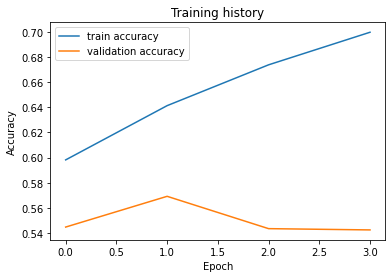

In [35]:
import matplotlib.pyplot as plt
plt.plot(history['train_acc'], label='train accuracy')
plt.plot(history['val_acc'], label='validation accuracy')
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
#plt.ylim([0, 1]);

In [36]:
val_acc, _ = eval_model(
  model,
  val_data_loader,
  loss_fn,
  device,
  len(val) #Change it to test when you have the test results
)
val_acc.item()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


0.5477031802120141

In [37]:
def get_predictions(model, data_loader):
  model = model.eval()
  sentence = []
  predictions = []
  prediction_probs = []
  real_values = []
  with torch.no_grad():
    for d in data_loader:
      texts = d["text"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      labels = d["label"].to(device)
      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)
      sentence.extend(texts)
      predictions.extend(preds)
      prediction_probs.extend(outputs)
      real_values.extend(labels)
  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu()
  real_values = torch.stack(real_values).cpu()
  return sentence, predictions, prediction_probs, real_values

In [38]:

y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(
  model,
  val_data_loader
)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [39]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_pred,zero_division=0, digits=4))

              precision    recall  f1-score   support

           0     0.3320    0.1963    0.2468       438
           1     0.4202    0.4938    0.4540       480
           2     0.7570    0.8104    0.7828      2257
           3     0.0000    0.0000    0.0000       176
           4     0.1104    0.0295    0.0465       611
           5     0.0000    0.0000    0.0000         0

    accuracy                         0.5477      3962
   macro avg     0.2700    0.2550    0.2550      3962
weighted avg     0.5359    0.5477    0.5354      3962

